# Example quantitative plots

How to plot the results of the quantitative evaluation.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os
import fnmatch
import pandas as pd
import sklearn.metrics as sm
import scipy.stats as ss
import matplotlib.pyplot as plt

import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()

from dense_correspondence.evaluation.evaluation import DenseCorrespondenceEvaluationPlotter as DCEP

If you have multiple networks trained, you can add them to the `nets_list` below, and they will be plotted together.

In [32]:
folder_name = ""
path_to_nets = os.path.join("data/pdc/trained_models", folder_name)
path_to_nets = utils.convert_to_absolute_path(path_to_nets)
all_nets = sorted(os.listdir(path_to_nets))
nets_to_plot = []

nets_list = [
#     "shoes_consistent_M_background_0.500_3", 
#     "shoes_aploss_3d_don_150_1:1",
    "shoes_aploss_3d_don_150_1:2",
    "shoes_aploss_3d_don_150_1:2_seed_2",
    "shoes_aploss_3d_don_150_1:2_seed_3",
    "shoes_aploss_3d_don_150_1:2_seed_4",
    "shoes_aploss_3d_don_150_1:2_seed_5",
#     "shoes_aploss_3d_don_150_1:4",
#     "shoes_aploss_3d_don_150_1:9",
#     "shoes_aploss_3d_don_150_1:19",
#     "shoes_aploss_3d_don_150_1:9_v2",
#     "shoes_aploss_3d_random_150",
#     "shoes_aploss_3d_ring_150_30_50",
#     "shoes_pcl_3d_not_normalized",
#     "shoes_pcl_3d_normalized",
]
for net in nets_list:
    nets_to_plot.append(os.path.join(folder_name,net))

In [3]:

src_dir = utils.getDenseCorrespondenceSourceDir()
path_to_csv = os.path.join(src_dir, 'data/pdc/trained_models', 
                           'shoes_aploss_3d_don_150_1:2', "analysis/train/data.csv")
df = pd.read_csv(path_to_csv, index_col=0, parse_dates=True)




In [6]:
data = df['pixel_match_error_l2_masked']
x_axis_scale_factor = 800

In [7]:
num_bins = 100

In [8]:
cumhist, l, b, e = ss.cumfreq(data, num_bins)
cumhist *= 1.0 / len(data)
x_axis = l + b * np.arange(0, num_bins)
x_axis /= x_axis_scale_factor

In [11]:
cumhist.shape

(100,)

In [12]:
x_axis.shape

(100,)

# Training 
Evaluate the network on the training scenes. Correspondences are all within scene

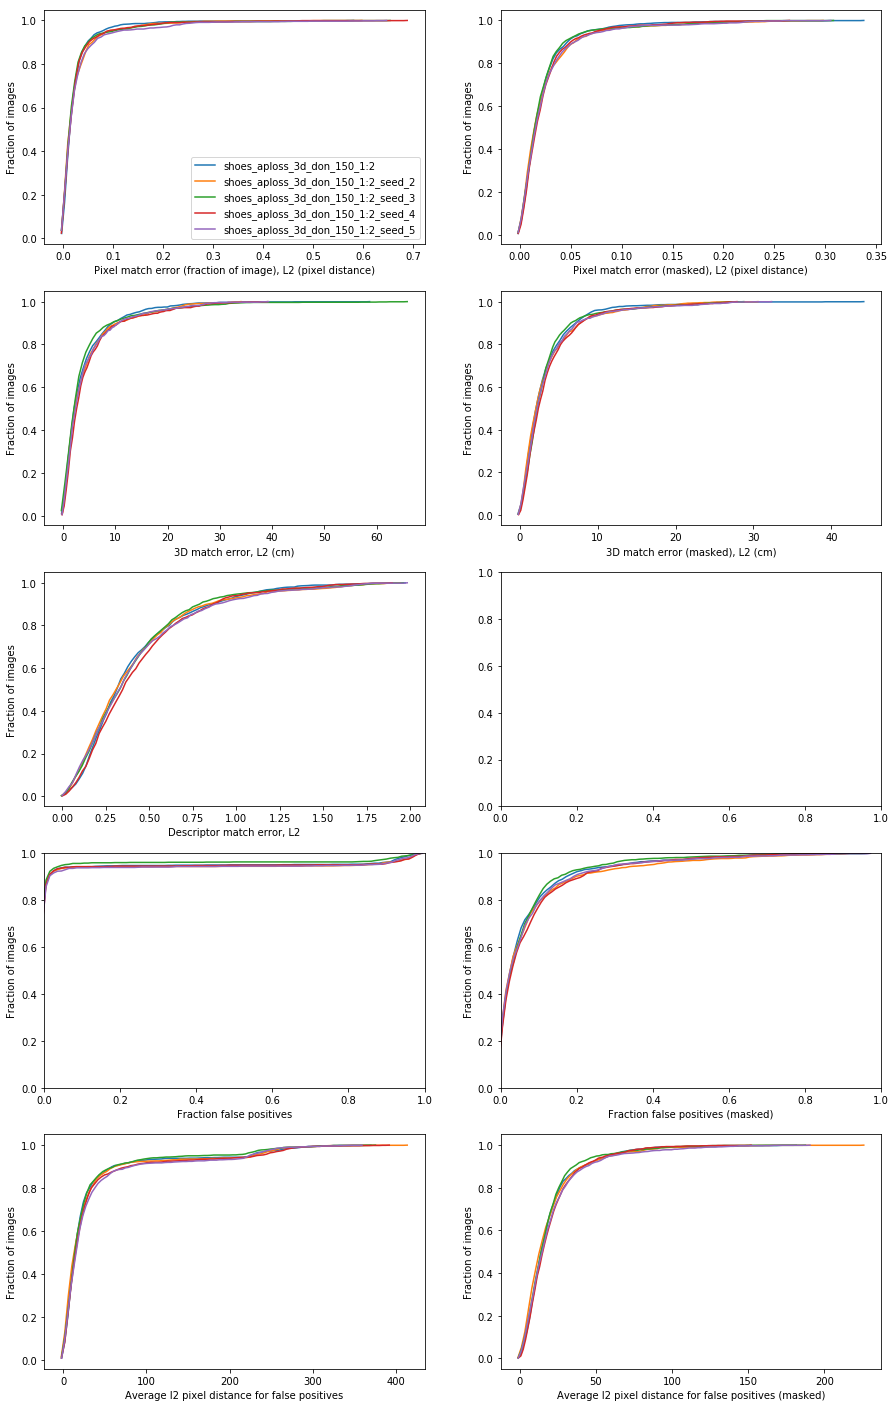

In [33]:
p = DCEP()
src_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(src_dir, 'data/pdc/trained_models', network_name, "analysis/train/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for network_name in nets_to_plot[1:]:
    path_to_csv = os.path.join(src_dir, 'data/pdc/trained_models', network_name, "analysis/train/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Training Set")
plt.show()

# Test
Evaluate the network on the test scenes. Correspondences are all within scene

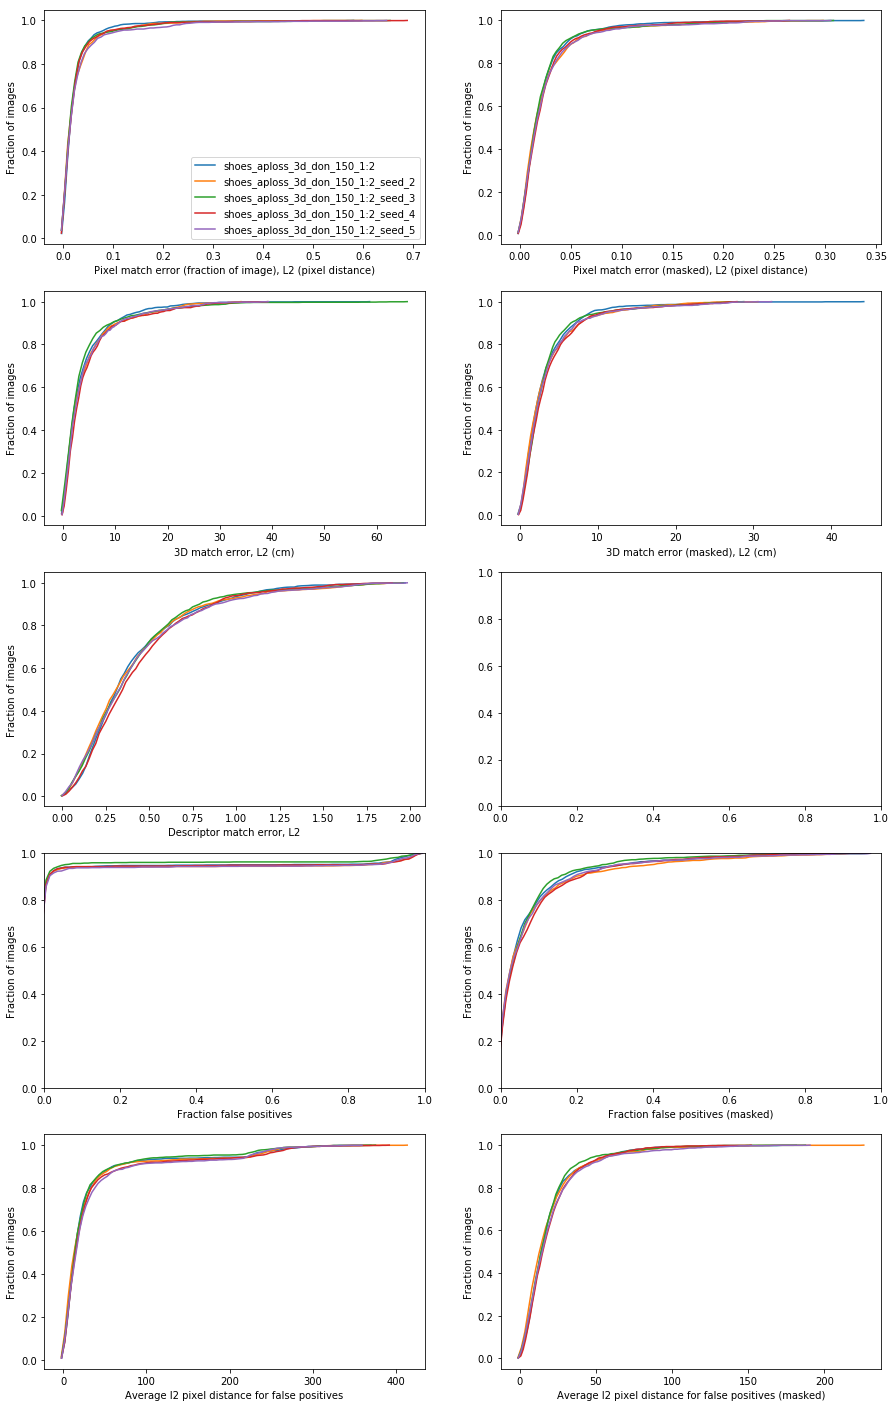

In [34]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(dc_source_dir, "data/pdc/trained_models", network_name, "analysis/test/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for network_name in nets_to_plot[1:]:
    path_to_csv = os.path.join(dc_source_dir, "data/pdc/trained_models", network_name, "analysis/test/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Test Set")
plt.show()

## Cross Scene Single Object
Evaluate the network on correspondences that come from different scenes. These correspondences were manually annotated only for evaluation purposes.

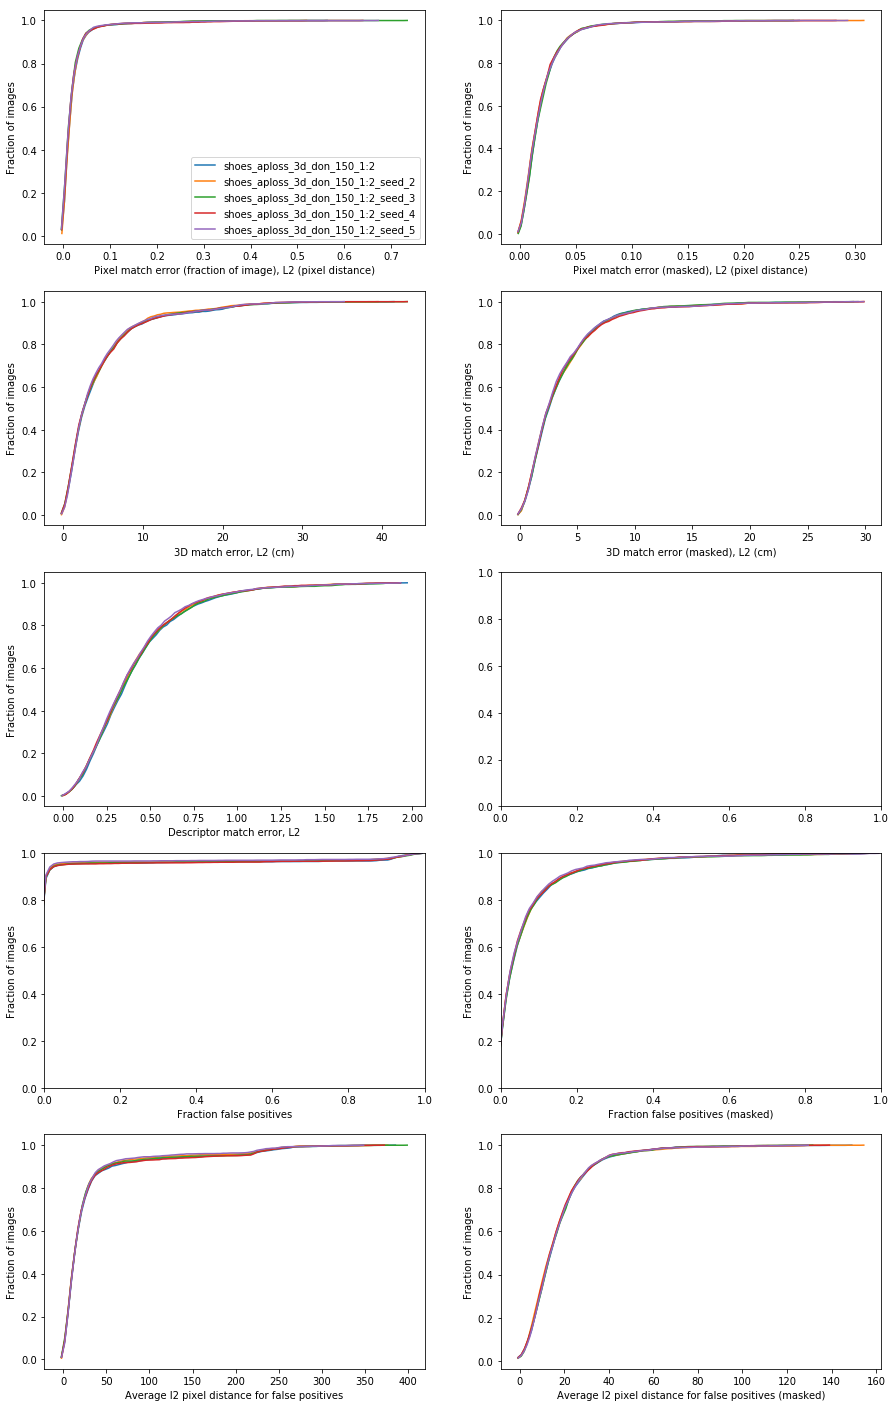

In [35]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(dc_source_dir, "data/pdc/trained_models", network_name, "analysis/cross_scene/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for network_name in nets_to_plot[1:]:
    path_to_csv = os.path.join(dc_source_dir, "data/pdc/trained_models", network_name, "analysis/cross_scene/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Cross Scene Set")
plt.show()